# **Financial Services Innovation Lab, Georgia Tech** 

## Programming Task for Summer Research 2024

***Minjun Andrew Kim***

### Task 1.1 - Download Data from SEC-EDGAR

Used sec_edgar_downloader to gather 10-K Filings for:

- Meta Platforms, Inc. -- CIK 0001326801
- Apple Inc.           -- CIK 0000320193
- Microsoft Corp       -- CIK 0000789019
- Amazon.com, Inc.     -- CIK 0001018724
- Alphabet Inc.        -- CIK 0001652044

10-K Filings are stored in /sec-edgar-filings, under each company's folder

## Imports

In [9]:
from sec_edgar_downloader import Downloader

## Code

In [10]:
dl = Downloader("Minjun", "ckandrew04@gmail.com")

tickers = ["META", "AAPL", "MSFT", "AMZN", "GOOGL"]

for ticker in tickers:
    dl.get("10-K", ticker)

### Task 1.2 - Text Analysis

Used openai as LLM to perform text analysis on the 10-K Filings from 1.1

## Imports

In [25]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import openai
import os
import re
from bs4 import BeautifulSoup
import nltk

In [26]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

# Directory path to the filings
base_directory = "/sec-edgar-filings"

# List of company tickers
tickers = ["META", "AAPL", "MSFT", "AMZN", "GOOGL"]

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [5]:
# Function to extract text from an HTML file
def extract_text_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    soup = BeautifulSoup(content, 'html.parser')
    for script_or_style in soup(["script", "style"]):
        script_or_style.decompose()
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text

# Function to extract the "Risk Factors" section from the filing text
def extract_risk_factors_section(text):
    start_keyword = "Item 1A. Risk Factors"
    end_keyword = "Item 1B."
    start_idx = text.find(start_keyword)
    end_idx = text.find(end_keyword, start_idx + 1)
    if start_idx != -1 and end_idx != -1:
        return text[start_idx:end_idx]
    else:
        return None

# Function to analyze the text to find the frequency of words
def analyze_text(text):
    words = word_tokenize(text.lower())
    return Counter(words)

# Function to plot the top words in risk factors
def plot_top_words(counter, company, top_n=10):
    words, counts = zip(*counter.most_common(top_n))
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.title(f'Top {top_n} Words in Risk Factors for {company}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Process each company's filings
for company in companies:
    path = os.path.join(base_directory, company, "10-K")
    risk_counter = Counter()
    for root, dirs, files in os.walk(path):
        for file in files:
            if file == 'full-submission.txt':
                file_path = os.path.join(root, file)
                text = extract_text_from_html(file_path)
                risk_text = extract_risk_factors_section(text)
                if risk_text:
                    risks = analyze_text(risk_text)
                    risk_counter.update(risks)

    # Plot the results for each company
    plot_top_words(risk_counter, company)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


ValueError: not enough values to unpack (expected 2, got 0)

In [44]:
"""
Financial Services Innovation Lab, Georgia Tech

Programming Task for Summer Research 2024

Minjun Andrew Kim
"""

#########################################################

"""
Task 1.1 - Download Data from SEC-EDGAR

Used sec_edgar_downloader to gather 10-K Filings for:

Meta Platforms, Inc. -- CIK 0001326801
Apple Inc.           -- CIK 0000320193
Microsoft Corp       -- CIK 0000789019
Amazon.com, Inc.     -- CIK 0001018724
Alphabet Inc.        -- CIK 0001652044

10-K Filings are stored in /sec-edgar-filings, under each company's folder
"""

from sec_edgar_downloader import Downloader

dl = Downloader("Minjun", "ckandrew04@gmail.com")

companies = ["META", "AAPL", "MSFT", "AMZN", "GOOGL"]

for company in companies:
    dl.get("10-K", company)

"""
Function for Task 2
"""

def download_10k(company):
    dl.get("10-K", company)

#########################################################

"""
Task 1.2 - Text Analysis

Used openai as LLM to perform text analysis on the 10-K Filings from 1.1
"""

import os
from bs4 import BeautifulSoup
import re

"""
Data Cleaning

Since the full-submission.txt given from sec-edgar-downloader consists of mostly useless data, 
we only extract the first <DOCUMENT> element in the file, which includes all the 10-K Filing texts
"""

items = ['item 1. ', 'item 1a. ', 'item 1b. ', 'item 1c. ', 'item 2. ', 
         'item 3. ', 'item 4. ', 'item 5. ', 'item 6. ', 'item 7. ', 'item 7a. ', 
         'item 8. ', 'item 9. ', 'item 9a. ', 'item 9b. ', 'item 9c. ', 'item 10. ', 
         'item 11. ', 'item 12. ', 'item 13. ', 'item 14. ', 'item 15. ', 'item 16. ']

def extract_10k_document(file_path):
    """
    Initially extraction from the full-submission.txt
    We only need the first <DOCUMENT> in the text file

    Args:
        file_path (String): path to full-submission.txt

    Returns:
        String: extracted document containing 10-K Filing contents
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    start_index = content.find('<DOCUMENT>')
    end_index = content.find('</DOCUMENT>', start_index) + len('</DOCUMENT>')

    # Extracting the content of the first <DOCUMENT> block
    document = content[start_index:end_index]

    # Check if it's the 10-K document
    return document

def clean_and_format_html(document):
    """
    Initially clean and format the html contents in the document file before organizing

    Args:
        document (String): original document text

    Returns:
        String: initially cleaned text
    """
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(document, 'lxml')

    # Remove script, style, and other unnecessary tags
    for script_or_style in soup(["script", "style", "img", "a"]):
        script_or_style.decompose()

    # Function to clean individual strings
    def clean_text(text):
        text = re.sub(r'\s+', ' ', text)  # Replace multiple whitespaces with single space
        text = re.sub(r'\s+\.', '.', text)  # Remove spaces before periods
        return text.strip()

    # Extract and format text
    text = []
    for element in soup.find_all(text=True):
        clean_element_text = clean_text(element)
        if clean_element_text:  #   Only add non-empty text
            text.append(clean_element_text)

    return ' '.join(text)

def extract_items(document, company):
    """
    Organizes the given document into a dictionary, separated by item number

    Args:
        document (String): document text
        company (String): company ticker

    Returns:
        dict: organized dictionary (Key -> Item, Value -> Content)
    """
    items_dict = {}

    doc = document.lower()

    # Cutting off the table of contents
    start_index = doc.find('item 1. business')
    
    # Exception case for MSFT filings (Earlier filings has "Item 1. Business" in table of contents)
    if company == 'MSFT':
        start_index = doc.find('item 1. business general')
    
    # Exception case for 2023 MSFT filing (text shows "Item 1. B USINESS GENERAL...")
    if start_index == -1:
        start_index = doc.find('item 1. b')

    doc = doc[start_index:]
    document = document[start_index:]

    for i in range(len(items)):
        start_index = doc.find(items[i]) + len(items[i])
        if i == len(items)-1:
            end_index = doc.find('signature title') if company == 'MSFT' else doc.find('signatures pursuant')
        else:
            end_index = doc.find(items[i+1])

        if start_index == len(items[i])-1:
            items_dict[items[i]] = 'None.'
            continue
        elif end_index == -1:
            end_index = doc.find(items[i+2]) if not i == len(items)-2 else doc.find('signatures pursuant')

        item_content = document[start_index:end_index]

        items_dict[items[i]] = item_content
        #items_dict[items[i]] = item_content[:20] + "..." + item_content[len(item_content)-20:]

    return items_dict

def deeper_clean_text(text):
    """
    Function to clean deeper text after organizing

    Args:
        text (String): text to clean

    Returns:
        String: cleaned text
    """
    text = re.sub(r'\b[\d\.\/]+\b', ' ', text)  # Remove numbers and terms like 10-Q, 10-K, etc.
    text = re.sub(r'\b\w{1,2}\b', ' ', text)  # Remove words of 1-2 letters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space

    return text

# Function to see progress through saved files. Not necessary for final product but nice to have
def save_document(content, save_path):
    with open(save_path, 'w', encoding='utf-8') as file:
        file.write(content)

companies_dict = {
    'META' : {},
    'AAPL' : {},
    'MSFT' : {},
    'AMZN' : {},
    'GOOGL' : {}
}

# Process each company's filings
for company in companies:
    company_path = os.path.join("sec-edgar-filings", company, "10-K")    
    for root, dirs, files in os.walk(company_path):
        for file in files:
            file_path = os.path.join(root, file)
            print(root)
            print(dirs)
            print(files)
            
            # Extract the portion of the full-submission.txt that contains the actual texts
            document = extract_10k_document(file_path)

            # Clean the extracted document
            document = clean_and_format_html(document)
            
            cleaned_root = "cleaned-" + root
            cleaned_path = os.path.join(cleaned_root, '10k_cleaned.txt')
            # os.makedirs(cleaned_root)
            # save_document(document, cleaned_path)
            
            # Organize the 10-K filing by Items
            items_dict = extract_items(document, company)

            for item in items:
                items_dict[item] = deeper_clean_text(items_dict[item])
            
            year = file_path[40:42] if company == 'GOOGL' else file_path[39:41]
            year = '19' + year if int(year) > 90 else '20' + year
            companies_dict[company][year] = items_dict

            # Save the whole dictionary
            # save_document(str(items_dict), os.path.join(cleaned_root, '10K_items.txt'))


sec-edgar-filings/META/10-K/0001326801-21-000014
[]
['full-submission.txt']


/var/folders/gp/7m6g5dfs4gq1sx84w5d785k00000gn/T/ipykernel_93359/3099497478.py:113: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for element in soup.find_all(text=True):


sec-edgar-filings/META/10-K/0001326801-16-000043
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-23-000013
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-22-000018
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-19-000009
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-15-000006
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-17-000007
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-20-000013
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-13-000003
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-18-000009
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-14-000007
[]
['full-submission.txt']
sec-edgar-filings/META/10-K/0001326801-24-000012
[]
['full-submission.txt']
sec-edgar-filings/AAPL/10-K/0001193125-08-224958
[]
['full-submission.txt']
sec-edgar-filings/AAPL/10-K/0001104659-06-084288
[]
['full-submission.txt']
sec-edgar-fi

In [45]:
from transformers import pipeline, AutoTokenizer
import torch
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
classifier = pipeline('sentiment-analysis', model='mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')

/Users/minjunkim/Desktop/Georgia Tech/FSIL/FSIL_2024_Task/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Before: NEGATIVE 0.9997250437736511
After: NEGATIVE -0.9997250437736511
Before: POSITIVE 0.9367699027061462
After: POSITIVE 0.9367699027061462
Before: NEGATIVE 0.998335063457489
After: NEGATIVE -0.998335063457489
Before: NEGATIVE 0.9981195330619812
After: NEGATIVE -0.9981195330619812
Before: NEGATIVE 0.9997426867485046
After: NEGATIVE -0.9997426867485046
Before: NEGATIVE 0.9992290735244751
After: NEGATIVE -0.9992290735244751
Before: POSITIVE 0.9971713423728943
After: POSITIVE 0.9971713423728943
Before: NEGATIVE 0.990731418132782
After: NEGATIVE -0.990731418132782
Before: POSITIVE 0.8775829076766968
After: POSITIVE 0.8775829076766968
Before: NEGATIVE 0.9997416138648987
After: NEGATIVE -0.9997416138648987
Before: NEGATIVE 0.9995402097702026
After: NEGATIVE -0.9995402097702026
Before: POSITIVE 0.9186123609542847
After: POSITIVE 0.9186123609542847
Before: POSITIVE 0.9548714756965637
After: POSITIVE 0.9548714756965637
Before: NEGATIVE 0.9962021708488464
After: NEGATIVE -0.9962021708488464
B

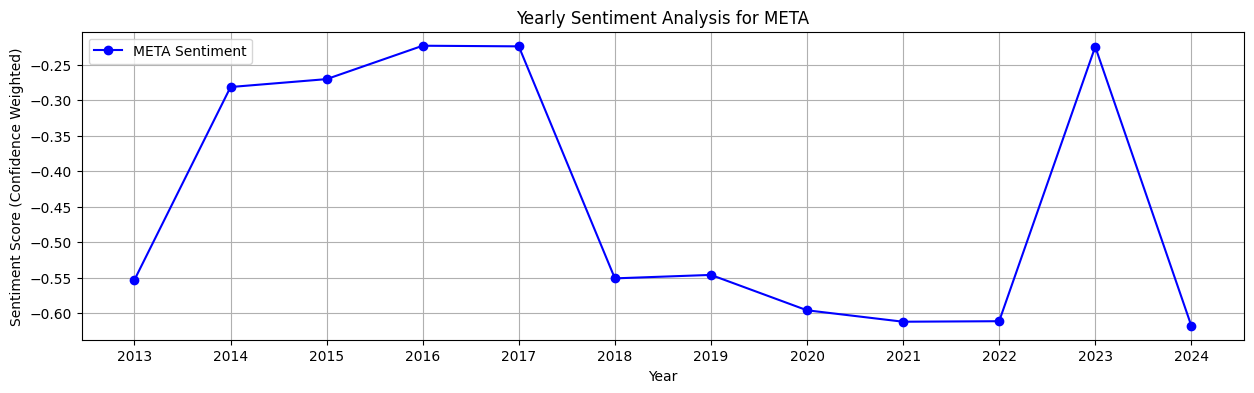

['1994', '1995', '1996', '1997', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


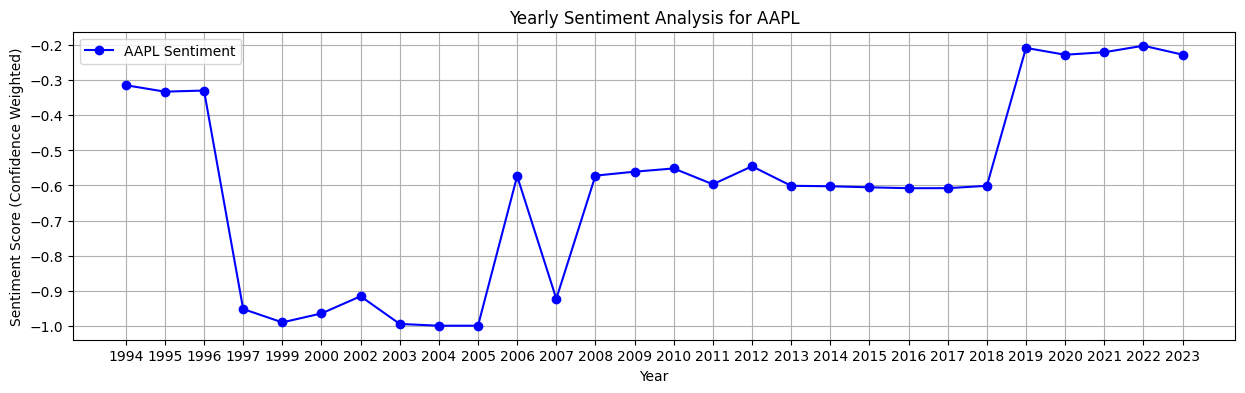

['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


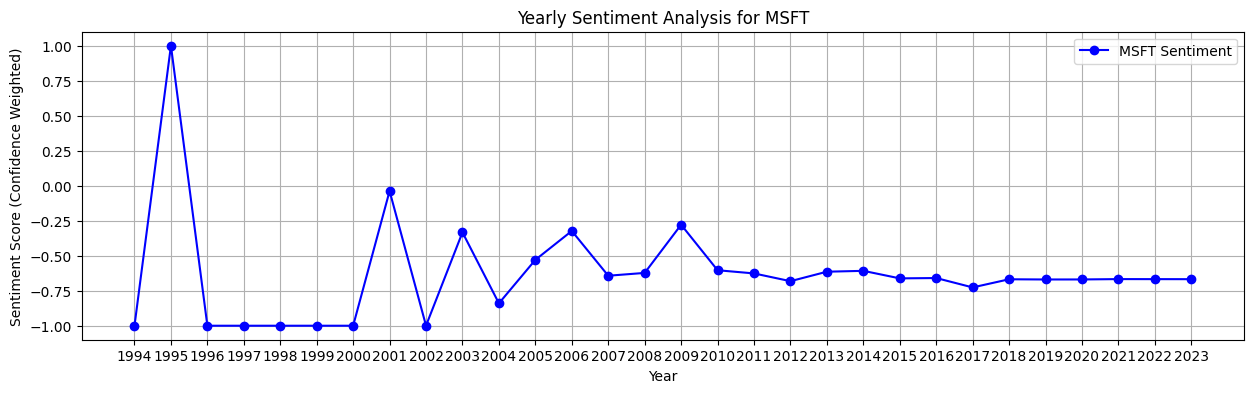

['1999', '2000', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


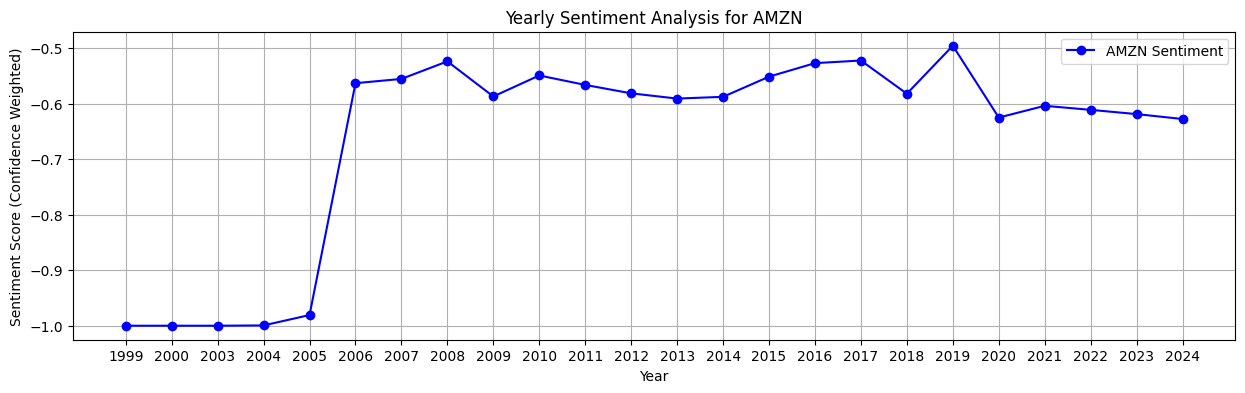

['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


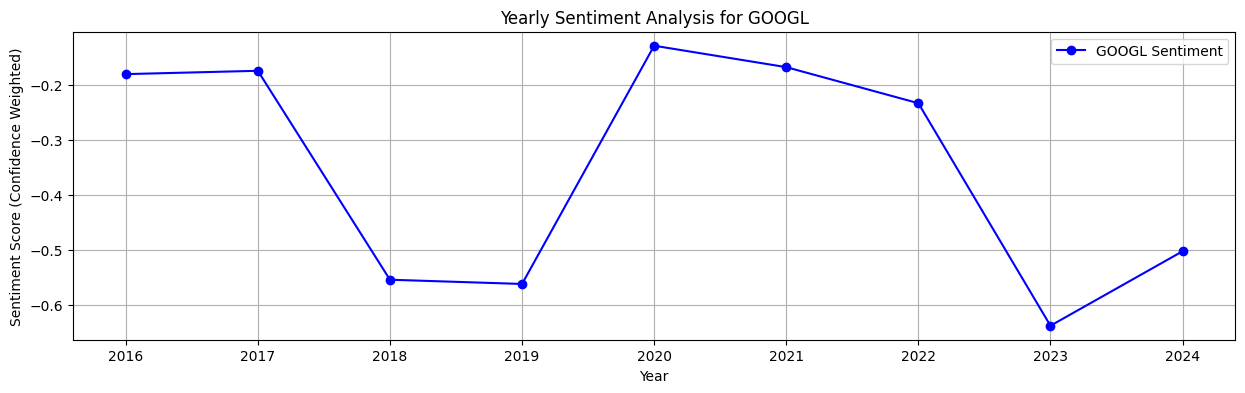

In [49]:
def analyze_sentiments(text):
    """
    Perform sentiment analysis on a single text, handling long texts appropriately."

    Args:
        text (String): text to perform sentiment analysis on

    Returns:
        tuple: tuple of (sentiment, score)
    """
    # Prepare the text input for the model, managing the max token size limit
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Predict sentiment
    with torch.no_grad():  # Disable gradient calculation for inference
        results = classifier.model(**inputs)
    
    # Interpret the model's output (you may need to adapt this depending on the model's specific output format)
    sentiment = 'POSITIVE' if results.logits[0][0] > results.logits[0][1] else 'NEGATIVE'
    score = torch.nn.functional.softmax(results.logits, dim=-1).max().item()

    return sentiment, score

def analyze_company_data():
    """ 
    Analyze sentiment across multiple texts, organizing by company and year."

    Returns:
        dict: dictionary of sentiment analysis score (confidence score multiplied by 1 or -1 depending on sentiment)
    """
    results = {}

    """
    Analyzes these itmes:
        Item 1. Business
        Item 1a. Risk Factors
        Item 7. Management's Discussion and Analysis of Financial Condition and Results of Operations
        Item 7a. Quantitative and Qualitative Disclosures About Market Risk
        Item 9. Changes in and Disagreements with Accountants on Accounting and Financial Disclosure
        Item 9A. Controls and Procedures
    """
    
    key_items = ['item 1. ', 'item 1a. ', 'item 7. ', 'item 7a. ', 'item 9. ', 'item 9a. ' ]

    for company, years_items in companies_dict.items():
        results[company] = {}

        for year, items in years_items.items():
            combined_confidence = []

            for item in key_items:
                item_content = items.get(item, '')
                if 'None.' not in item_content:
                    sentiment, confidence = analyze_sentiments(item_content)
                    print("Before: " + sentiment + " " + str(confidence))
                    confidence *= -1 if sentiment == 'NEGATIVE' else 1
                    print("After: " + sentiment + " " + str(confidence))
                    combined_confidence.append(confidence)

            average_confidence = sum(combined_confidence) / len(combined_confidence)
            results[company][year] = average_confidence
            
    return results

def visualize_sentiments(results):
    """
    Visualize the sentiment analysis results.


    Args:
        results (dict): dictionary containing sentiment analysis scores
    """
    for company, data in results.items():
        fig, ax = plt.subplots(figsize=(15,4))

        years = list(data.keys())
        years.sort()
        print(years)
        
        #sentiments = [1 if data[year][0] == 'POSITIVE' else -1 for year in years]
        confidences = [data[year] for year in years]
        
        plt.plot(years, confidences, label=f'{company} Sentiment', marker='o', linestyle='-', color='blue')
        plt.title(f'Yearly Sentiment Analysis for {company}')
        plt.xlabel('Year')
        plt.ylabel('Sentiment Score (Confidence Weighted)')
        plt.grid(True)
        plt.legend()
        plt.savefig(f'sentiment-analysis-plots/{company}-sentiment.png')
        plt.show()

results = analyze_company_data()
visualize_sentiments(results)

# Thematic Analysis

In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   stop_words='english',
                                   ngram_range=(1, 2),
                                   token_pattern=r'\b[a-zA-Z]{3,}\b')  # Only words with 3+ letters

def thematic_analysis(item_key):
    for company, data in companies_dict.items():
        corpus = [data[year].get(item_key, "").lower() for year in sorted(data.keys())]
        tfidf = tfidf_vectorizer.fit_transform(corpus)
        lda = LatentDirichletAllocation(n_components=5, random_state=0)
        lda.fit(tfidf)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        print(f"Thematic Analysis for {company} - {item_key}:")
        for topic_idx, topic in enumerate(lda.components_):
            print(f"Topic #{topic_idx}: {' '.join([feature_names[i] for i in topic.argsort()[:-11:-1]])}")
        print("\n")

In [61]:
thematic_analysis('item 8. ')

Thematic Analysis for META - item 8. :
Topic #0: combination stock shares denied motion marketable debt plaintiffs product value reporting additionally behalf units
Topic #1: combination stock shares denied motion marketable debt plaintiffs product value reporting additionally behalf units
Topic #2: combination stock shares denied motion marketable debt plaintiffs product value reporting additionally behalf units
Topic #3: income attributable facility attributable common participating ipo contingent statements facebook stock plan participating securities contingent consideration
Topic #4: meta finance meta platforms platforms ftc equity investments regulatory restructuring finance leases equity securities


Thematic Analysis for AAPL - item 8. :
Topic #0: amounts user table accompanying statements zeq component consolidated table fiscal assets end jjorge user jjorge table zeq table september
Topic #1: amounts user component consolidated statements zeq table accompanying table fiscal as

# Trend Analysis

In [67]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def advanced_summarize(text):
    parts = [text[i:i+1024] for i in range(0, len(text), 1024)]
    summaries = []
    for part in parts:
        input_ids = tokenizer(part, return_tensors="pt", truncation=True, max_length=1024)['input_ids']
        output = model.generate(input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)
    return ' '.join(summaries)

def trend_analysis(item_key):
    for company, years_data in companies_dict.items():
        print(f"\nTrend Analysis for {company} - {item_key}")
        for year, data in years_data.items():
            if item_key in data and data[item_key]:
                try:
                    summary = advanced_summarize(data[item_key])
                    print(f"{year} Summary: {summary}")
                except Exception as e:
                    print(f"Error processing {year} data for {company}: {str(e)}")
            else:
                print(f"{year} Summary: No data available.")

In [71]:
trend_analysis('item 10. ')


Trend Analysis for META - item 10. 
2021 Summary: The information required this item incorporated reference our Proxy Statement for the Annual Meeting Stockholders filed with the SEC within days the fiscal year ended December,. Our board directors has adopted Code Conduct applicable all officers, directors and employees, which available our website (investor com) under "Corporate Governance"
2016 Summary: The information required this item incorporated reference our Proxy Statement for the Annual Meeting Stockholders filed with the Securities and Exchange Commission (SEC) within days the fiscal year ended December. Our board directors has adopted Code Conduct applicable all officers, directors and employees, which available our website (investor com) under "Corporate Governance"
2023 Summary: Directors, Executive Officers and Corporate Governance. The information required this item incorporated reference our Proxy Statement for the Annual Meeting Stockholders filed with the SEC within

KeyboardInterrupt: 

# Change point detection

In [ ]:
from ruptures import detect
import ruptures as rpt
import numpy as np

def detect_changes(topics_over_time):
    points = np.array([topics_over_time[year] for year in sorted(topics_over_time.keys())])
    algo = rpt.Pelt(model="rbf").fit(points)
    result = algo.predict(pen=3)
    rpt.display(points, result)
    plt.title('Change Point Detection in Topics')
    plt.show()

# Risk Factor Analysis

In [74]:

import re
import matplotlib.pyplot as plt
import networkx as nx
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Adding custom stopwords
custom_stopwords = set(['may', 'company', 'also', 'could', 'would'])
stopwords = ENGLISH_STOP_WORDS.union(custom_stopwords)

def preprocess_text(text):
    """ Lowercase, remove punctuation, and tokenize text. """
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    tokens = [word for word in word_tokenize(text) if word not in stopwords]
    return tokens

def build_network(companies_dict, item_key='Item 1A.'):
    G = nx.Graph()
    
    for company, years_data in companies_dict.items():
        for year, data in years_data.items():
            if item_key in data:
                text = data[item_key]
                tokens = preprocess_text(text)
                unique_tokens = set(tokens)  # Use set to avoid duplicate terms in the same document

                # Add nodes and edges between all unique tokens in this section
                for token1 in unique_tokens:
                    for token2 in unique_tokens:
                        if token1 != token2:
                            if G.has_edge(token1, token2):
                                G[token1][token2]['weight'] += 1
                            else:
                                G.add_edge(token1, token2, weight=1)
    
    return G

def visualize_network(G, threshold=0):
    """ Visualize the network with an optional threshold for edge weights. """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.1)  # k regulates the distance between nodes

    # Draw nodes and edges with weights above threshold
    edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > threshold]
    weights = [G[u][v]['weight'] for (u, v) in edges]
    
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=50)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
    
    plt.title("Risk Factor Co-occurrence Network")
    plt.axis('off')
    plt.show()

# Build the network
G = build_network(companies_dict, item_key='item 1a. ')

# Visualize the network with a threshold to only show stronger connections
visualize_network(G, threshold=1)

KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

# Keyword Tracking Over Time

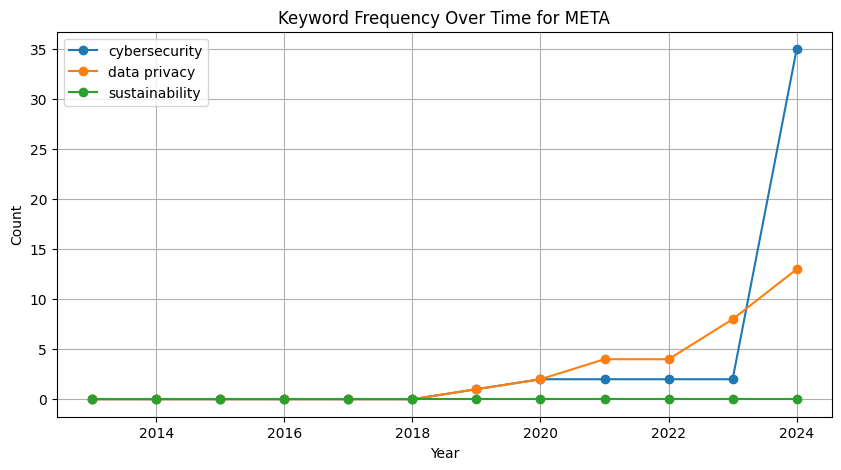

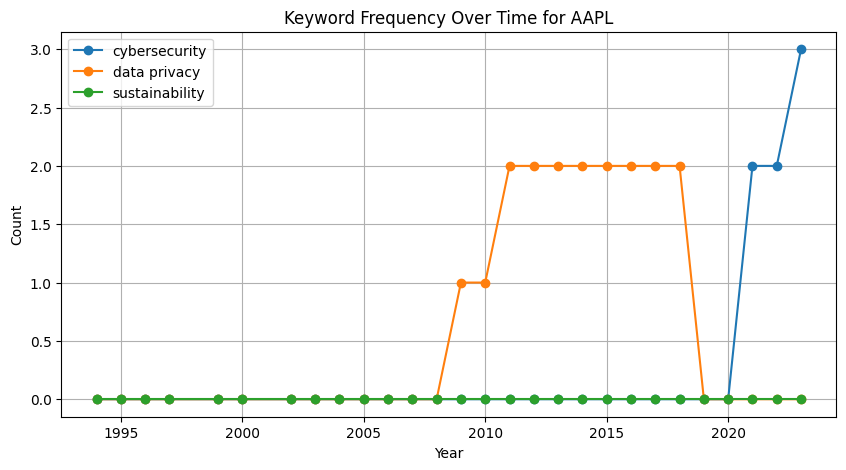

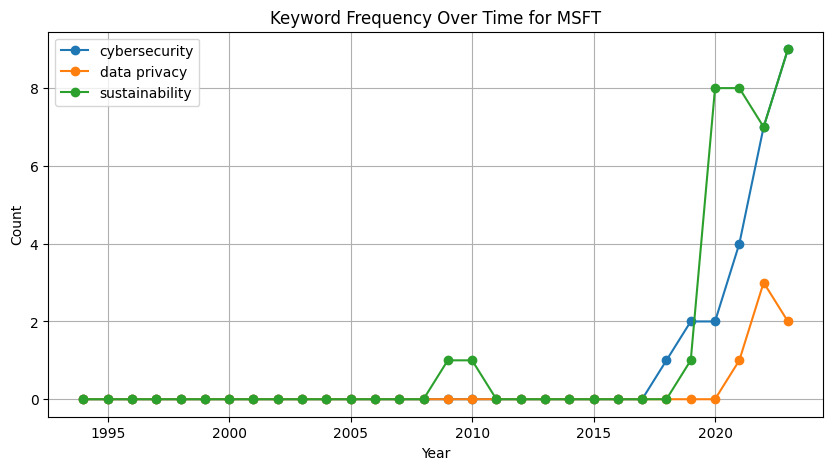

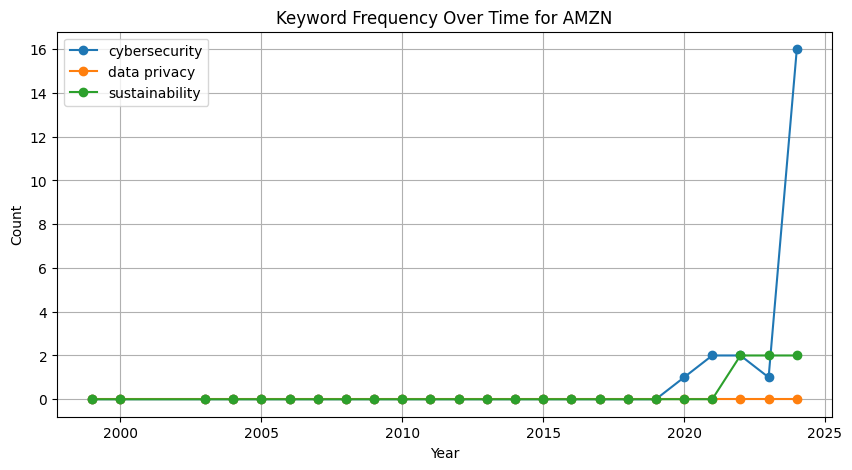

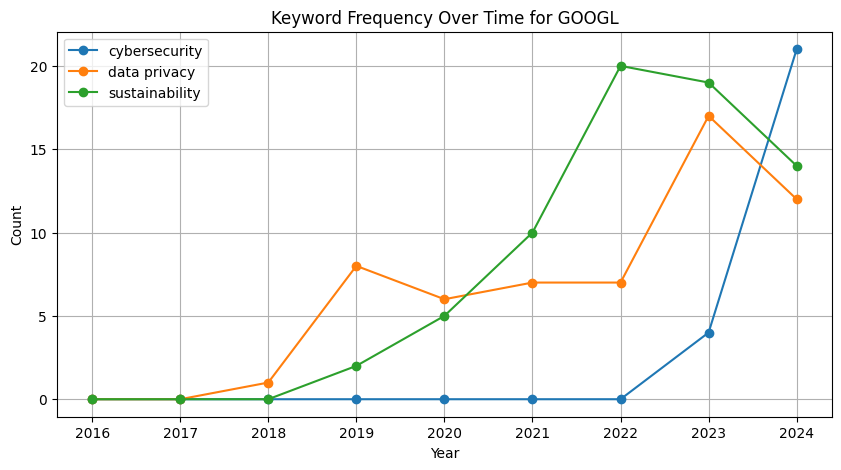

In [77]:
def keyword_tracking(keywords):
    # Initialize results dictionary
    results = {company: {keyword: [] for keyword in keywords} for company in companies_dict}
    
    # Collect counts for each keyword by year
    for company, years_data in companies_dict.items():
        for year, data in years_data.items():
            content = " ".join(data.values())  # Assuming data is a dict of items
            content = content.lower()  # Normalize text to lower case
            for keyword in keywords:
                count = content.count(keyword.lower())
                results[company][keyword].append((int(year), count))  # Convert year to int for sorting

    # Plotting results
    for company, keywords_data in results.items():
        plt.figure(figsize=(10, 5))
        for keyword, counts in keywords_data.items():
            # Sort years before plotting
            counts.sort()  # Sorts by the first element in tuple, which is year
            years = [year for year, count in counts]
            values = [count for year, count in counts]
            plt.plot(years, values, marker='o', label=f'{keyword}')

        plt.title(f'Keyword Frequency Over Time for {company}')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
keywords = ['cybersecurity', 'data privacy', 'sustainability']
keyword_tracking(keywords)


# Advanced Data Visualization

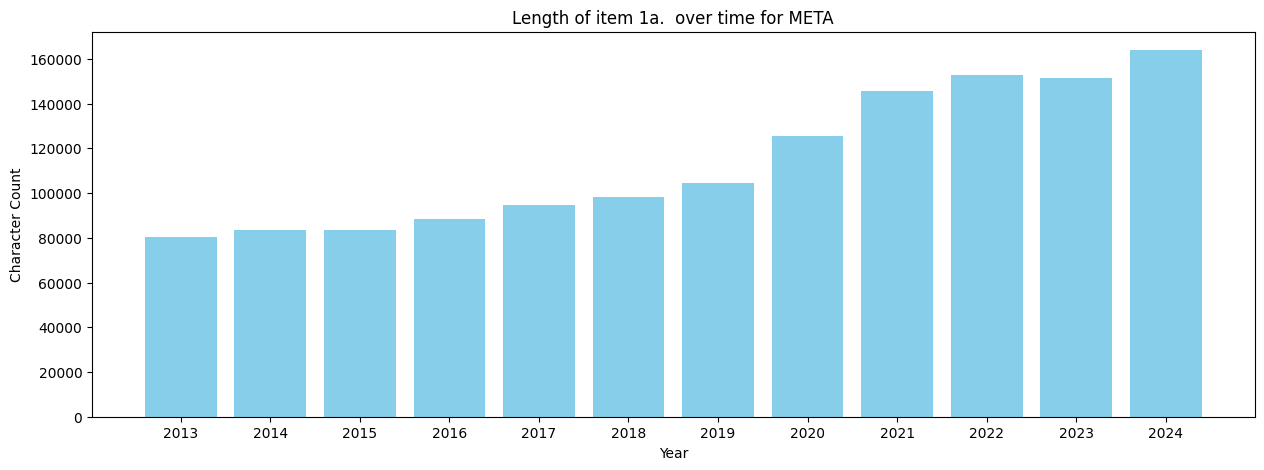

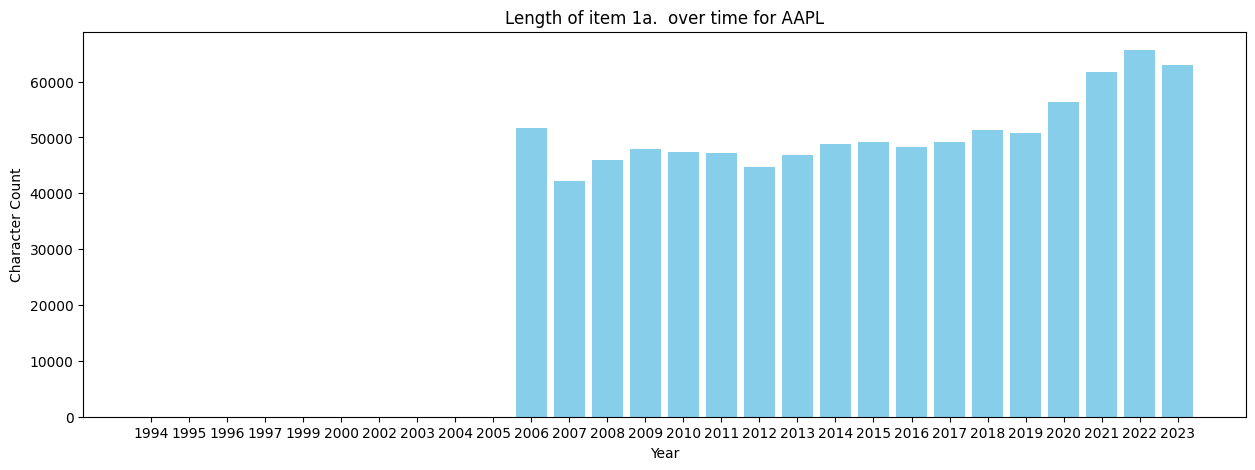

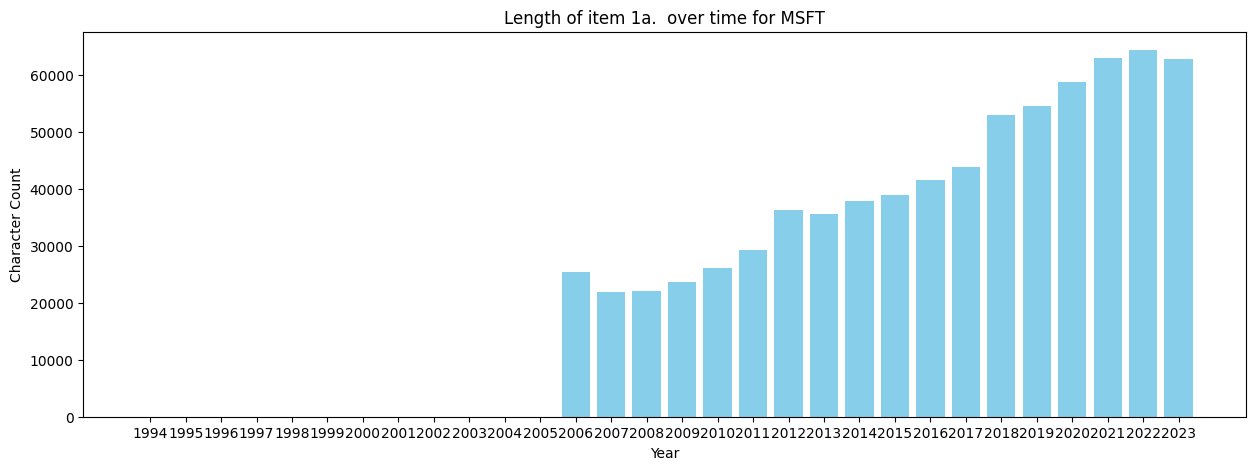

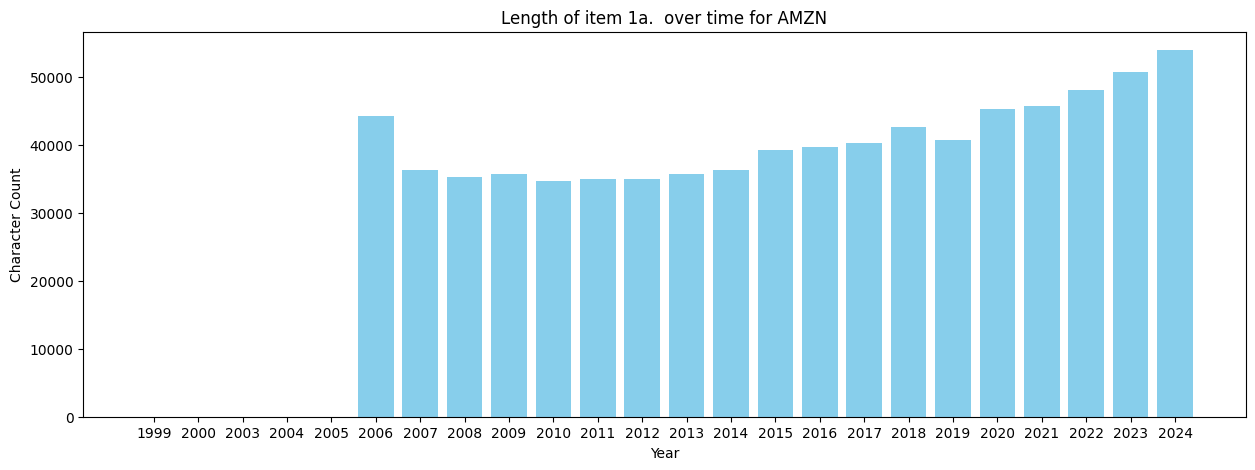

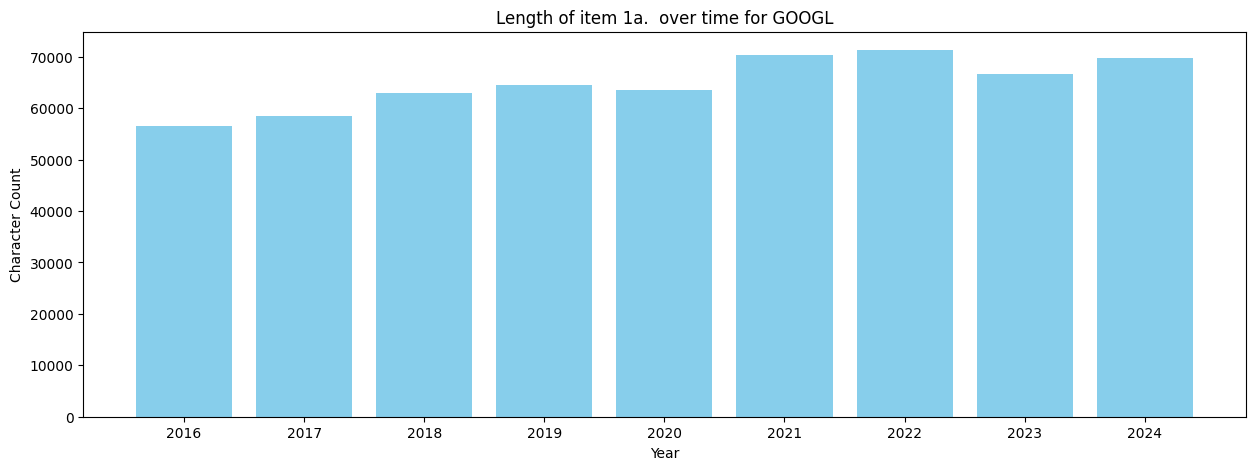

In [80]:

def visualize_section_length(item_key):
    for company, years_data in companies_dict.items():
        years = sorted(years_data.keys())
        lengths = [len(years_data[year][item_key]) if item_key in years_data[year] else 0 for year in years]

        plt.figure(figsize=(15, 5))
        plt.bar(years, lengths, color='skyblue')
        plt.title(f'Length of {item_key} over time for {company}')
        plt.xlabel('Year')
        plt.ylabel('Character Count')
        plt.show()

visualize_section_length('item 1a. ')